<a href="https://colab.research.google.com/github/MansiD7-ubey/AIMLMonth2023/blob/main/Uber_Data_Analysis_Mansi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Why Data Analysis?
Companies have lots of data. To grow business , sometimes data analysis is required. By analyzing data we get important topics on which we have to work on to make our business grow by taking necessary decision.

# Project Goals
- How long do people travel in Uber?
- What Hour Do most of the people take uber?
- What is the purpose of the trip?
- Which day has the highest number of trips?
- What are the number of trips each day?

## Download the dataset


In [ ]:
#  Shift + Enter
!wget https://www.dropbox.com/s/i85qjzm0cjh3p4z/UberData.csv

--2023-07-02 05:54:10--  https://www.dropbox.com/s/i85qjzm0cjh3p4z/UberData.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/i85qjzm0cjh3p4z/UberData.csv [following]
--2023-07-02 05:54:11--  https://www.dropbox.com/s/raw/i85qjzm0cjh3p4z/UberData.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6d819ab456fb5cfa78aa007cf3.dl.dropboxusercontent.com/cd/0/inline/B_F80SPyJXGM-PRg29D8iE1yhw7DEFXUuiym0y-KjoiIil4efYjHnBHGxcYRVsC_VPkAQu8R_6bI0HVNy6FtNU3aZ8hc_DiAnbRI3rLeILgwr_KpzADXjLDzQuD4uX3GYrcDF3eChOZHH-DJLGZgDCj7pjtEkdmUNumde79YQuLSbQ/file# [following]
--2023-07-02 05:54:11--  https://uc6d819ab456fb5cfa78aa007cf3.dl.dropboxusercontent.com/cd/0/inline/B_F80SPyJXGM-PRg29D8iE1yhw7DEFXUuiym0y-KjoiIil4efYjHnBHGxcYRVsC_VPkAQu8R_6bI0HVN

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('UberData.csv')

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.shape

(1156, 7)

In [ ]:
data.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [ ]:
data.head(5)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
# renaming the columns - removing the *
columns = ['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES','PURPOSE']

In [ ]:
# updating the dataframe columns with the new columns.
data.columns = columns

In [ ]:
data.head(n=5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
data.tail(n=5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [ ]:
# removing the last unnecassiry row
data = data.drop(index = 1155)

In [ ]:
data.shape

(1155, 7)

In [ ]:
data.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


# Missing Values

In [ ]:
data.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

**Handling missing**

- Dropping rows
- Drop column
- Estimate (Approximate) -> Fill

In [ ]:
# data.dropna()

In [ ]:
data = data.fillna(value='Other')

In [ ]:
data.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [ ]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Other
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# Data Types

In [ ]:
data.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [ ]:
# converting string into datetime object.

data['START_DATE'] = pd.to_datetime(data['START_DATE'])
data['END_DATE'] = pd.to_datetime(data['END_DATE'])

In [ ]:
data.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

# Feature Engineering

In [ ]:
ts = data['START_DATE'][0]
ts

Timestamp('2016-01-01 21:11:00')

In [ ]:
ts.dayofweek

4

In [ ]:
ts.month

1

In [ ]:
ts.day

1

In [ ]:
ts.year

2016

In [ ]:
# dt is the way to show year is related to datetime.
data['START_DATE'].dt.year

0       2016
1       2016
2       2016
3       2016
4       2016
        ... 
1150    2016
1151    2016
1152    2016
1153    2016
1154    2016
Name: START_DATE, Length: 1155, dtype: int64

In [ ]:
# Creating New features/Columns

data['HOUR'] = data['START_DATE'].dt.hour
data['DAY'] = data['START_DATE'].dt.day
data['MONTH'] = data['START_DATE'].dt.month
data['DAYOFWEEK'] = data['START_DATE'].dt.dayofweek
data['DAYNAME'] = data['START_DATE'].dt.day_name()

In [ ]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,DAYOFWEEK,DAYNAME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Other,1,2,1,5,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,Wednesday


In [ ]:
data.shape

(1155, 12)

# Exploratory Data Analysis

In [ ]:
data['CATEGORY'].value_counts()

Business    1078
Personal      77
Name: CATEGORY, dtype: int64

In [ ]:
sns.countplot(data['CATEGORY'])

ValueError: ignored

### How long (miles) do people travel in Uber?

In [ ]:
data['MILES']

0        5.1
1        5.0
2        4.8
3        4.7
4       63.7
        ... 
1150     0.7
1151     3.9
1152    16.2
1153     6.4
1154    48.2
Name: MILES, Length: 1155, dtype: float64

In [ ]:
data['MILES'].value_counts()

9.9     28
3.1     26
2.1     19
10.4    19
3.0     19
        ..
46.9     1
40.2     1
16.6     1
19.3     1
48.2     1
Name: MILES, Length: 256, dtype: int64

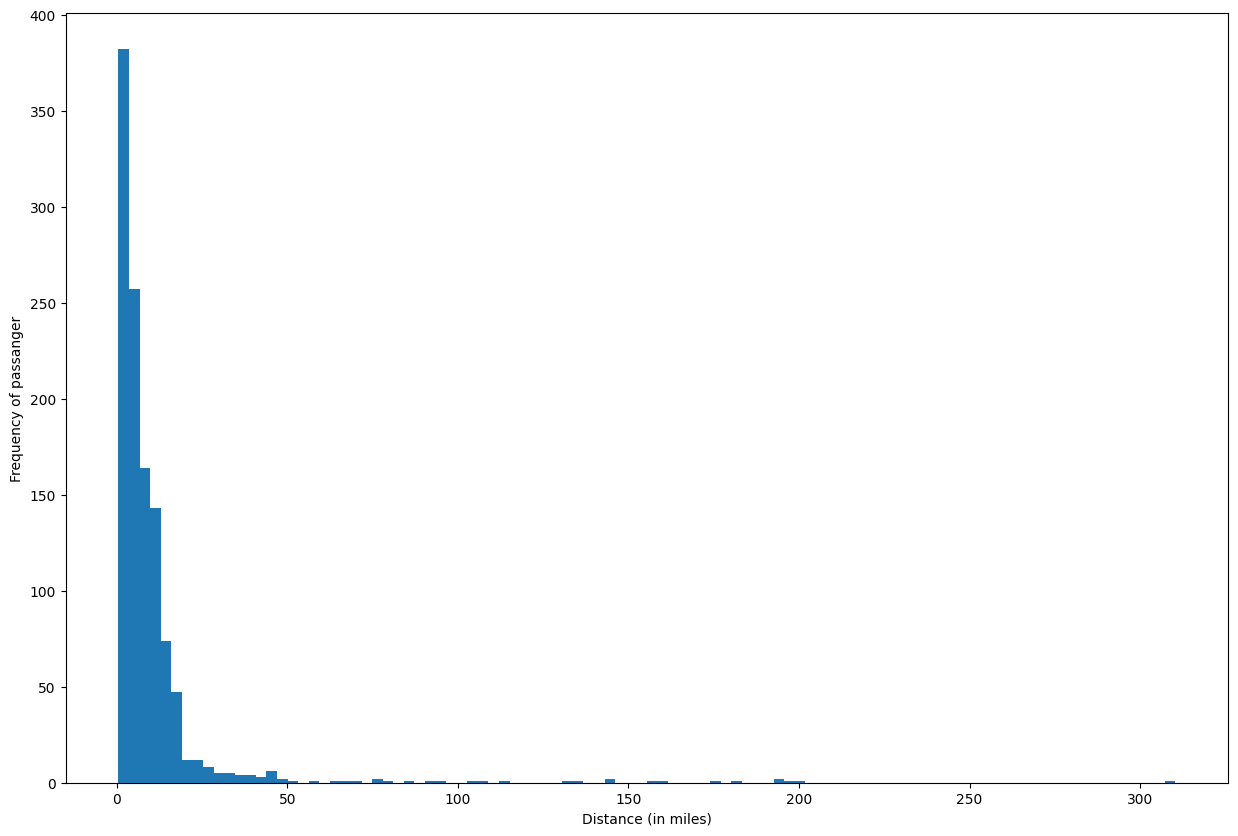

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(data['MILES'], bins=100)
plt.xlabel("Distance (in miles)")
plt.ylabel("Frequency of passanger")
plt.show()

**Observation:**
1. People often use Uber for short rides.

## What hour do most people take uber?

In [ ]:
data['HOUR']

0       21
1        1
2       20
3       17
4       14
        ..
1150     1
1151    13
1152    15
1153    21
1154    22
Name: HOUR, Length: 1155, dtype: int64

In [ ]:
data['HOUR'].value_counts()

15    98
17    95
13    94
18    94
14    89
16    88
12    77
11    72
20    71
19    68
10    65
9     51
21    51
8     35
22    31
23    26
0     19
7     13
1      5
5      4
6      4
3      3
2      2
Name: HOUR, dtype: int64

<Axes: ylabel='count'>

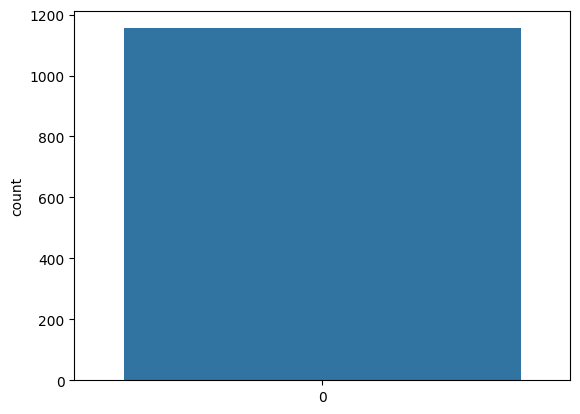

In [ ]:
sns.countplot(data['HOUR'])

### Purpose of the Trip

In [ ]:
data['PURPOSE'].value_counts()

<Axes: >

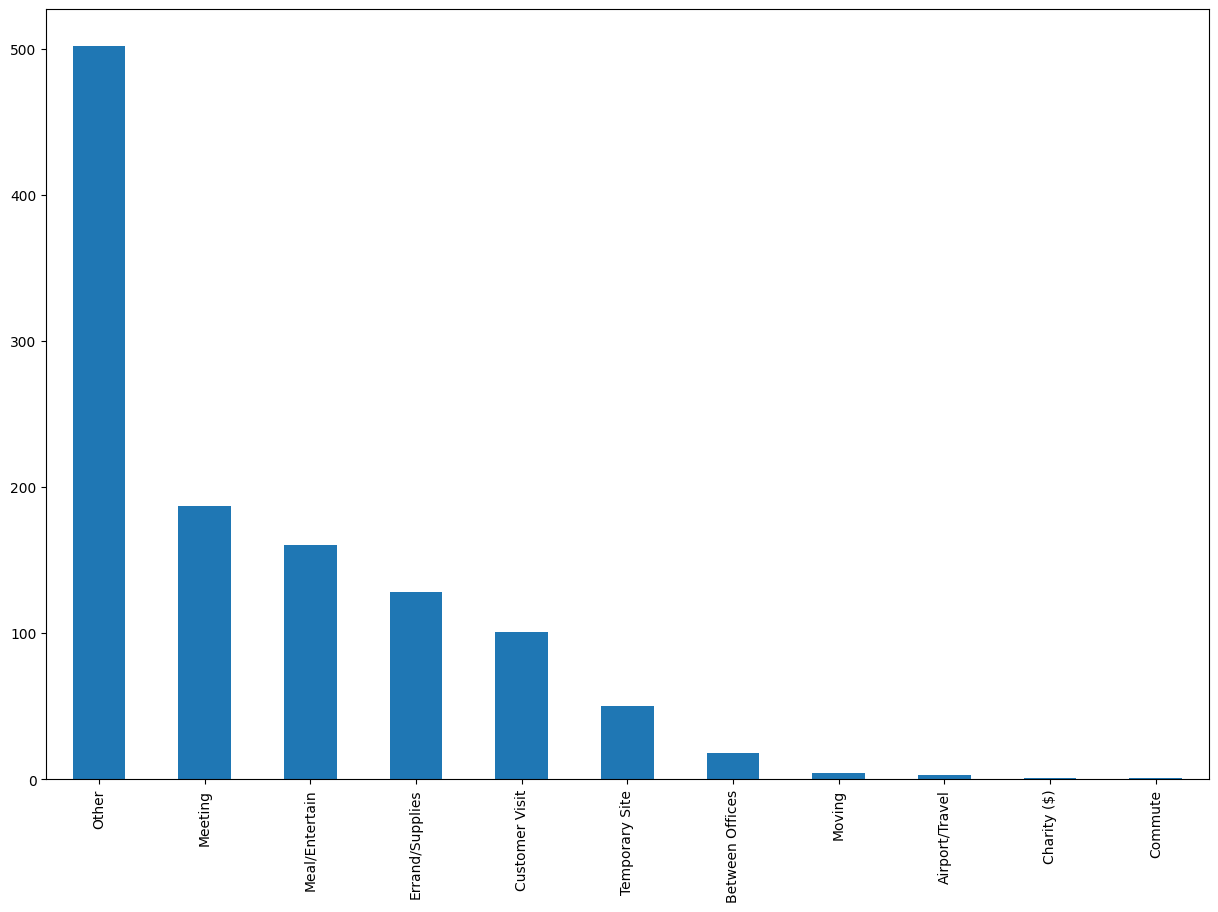

In [ ]:
plt.figure(figsize=(15,10))
data['PURPOSE'].value_counts().plot(kind='bar')


In [ ]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,DAYOFWEEK,DAYNAME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Other,1,2,1,5,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,Wednesday


<Axes: >

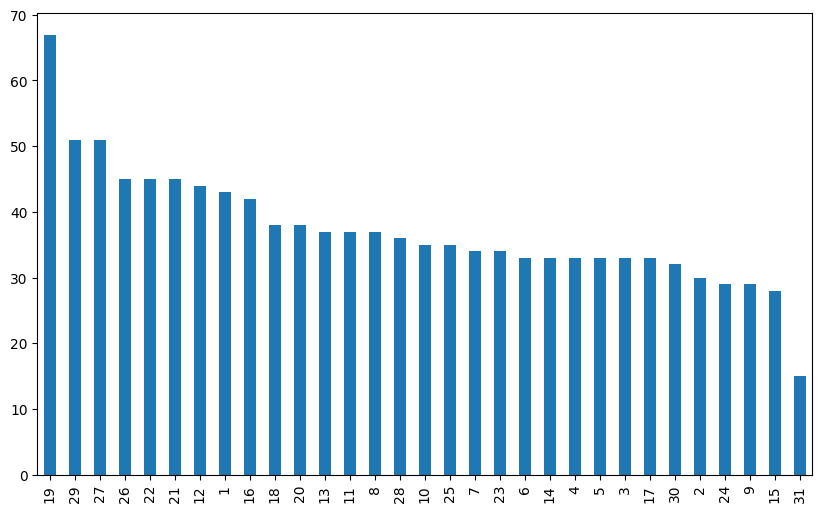

In [ ]:
plt.figure(figsize=(10,6))

data['DAY'].value_counts().plot(kind='bar')

### MONTH

<Axes: >

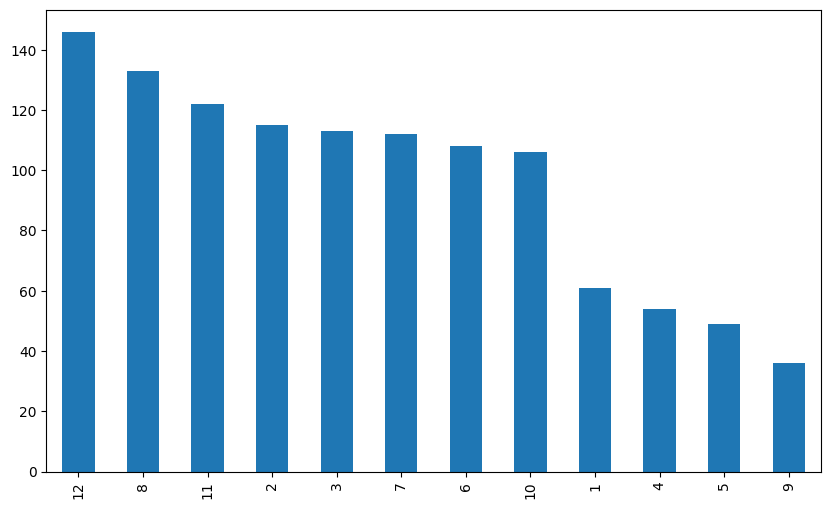

In [ ]:
plt.figure(figsize=(10,6))
data['MONTH'].value_counts().plot(kind='bar')


In [ ]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,DAYOFWEEK,DAYNAME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Other,1,2,1,5,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,Wednesday


In [ ]:
def convertMinutes(time):
    return time.seconds/60

In [ ]:
(data['END_DATE'] - data['START_DATE']).apply(convertMinutes)

0         6.0
1        12.0
2        13.0
3        14.0
4        67.0
        ...  
1150      7.0
1151     18.0
1152     35.0
1153     18.0
1154    103.0
Length: 1155, dtype: float64

In [ ]:
data['DURATION_MIN'] = (data['END_DATE'] - data['START_DATE']).apply(convertMinutes)

In [ ]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,DAYOFWEEK,DAYNAME,DURATION_MIN
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,Friday,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Other,1,2,1,5,Saturday,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,Wednesday,67.0


In [ ]:
data['DURATION_MIN'].value_counts()

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(data['DURATION_MIN'], bins=150, kde=True)

# SPEED

In [ ]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,DAYOFWEEK,DAYNAME,DURATION_MIN
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,Friday,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Other,1,2,1,5,Saturday,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,Wednesday,67.0


In [ ]:
data['SPEED_KMPH'] = (data['MILES']*1.609) / (data['DURATION_MIN']/60)

In [ ]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,DAYOFWEEK,DAYNAME,DURATION_MIN
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,Friday,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Other,1,2,1,5,Saturday,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,Wednesday,67.0


In [ ]:
data[ data['SPEED_KMPH']>10000 ]

KeyError: ignored

In [ ]:
data[ data['SPEED_KMPH']<10000 ]['SPEED_KMPH'].mean()

KeyError: ignored

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['SPEED_KMPH'])

KeyError: ignored

<Figure size 1000x600 with 0 Axes>

In [ ]:
data.head()

In [ ]:
data.to_csv('cleaned_data.csv', index=False)